In [27]:
import pandas 
import matplotlib.pyplot as plt

pandas.options.mode.chained_assignment = None  # default='warn'

bb = pandas.read_csv('/home/skamy/Proyectos/7506/nlp-getting-started/test.csv')

bb.head(5)

bb.isna().sum()

#Limpio los datos de NaN
# fl = bb.dropna(how='any')

id             0
keyword       26
location    1105
text           0
dtype: int64

In [51]:

#Add new col with the word count of twits
count = bb['text'].str.split().str.len()
bb['word_count'] = count

#gets twitter handles
bb = bb[bb['text'].str.contains("@")]
#create col with all the twitter handle
bb['twitter_handle'] = bb['text'].str.extract('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)')

#counts twits with no halde mention //57
bb['twitter_handle'].isna().sum()
#count duplicates haldes total 134 | dropna 78
clean_twitter_handle = bb['twitter_handle'].dropna()
# clean_twitter_handle.duplicated().sum()

duplicated_handles = clean_twitter_handle.loc[clean_twitter_handle.duplicated() == True]
duplicated_handles.value_counts()


YouTube            31
Change             13
MikeParrActor       3
ViralSpell          3
djicemoon           2
TontitownGrape      2
ApolloBrown         2
LivingSafely        2
emmerdale           2
MeekMill            2
GraysonDolan        2
noobde              1
TheAdvocateMag      1
ShaunKing           1
wusa9               1
ScorpionCBS         1
PumpkinMari_Bot     1
nytimes             1
edsheeran           1
worldnetdaily       1
PPact               1
YoungHeroesID       1
camilacabello97     1
usatoday            1
RaynbowAffair       1
Name: twitter_handle, dtype: int64

Text(0.5,1,'Word count per twit')

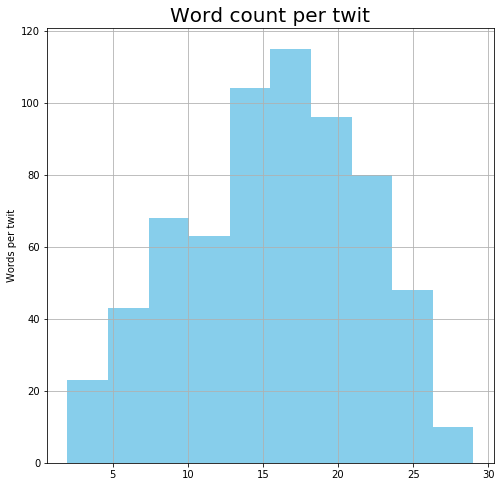

In [24]:
##count total number of words | short in a hurry long had time to think not eme
text_counts = fl['text'].str.cat().split(' ')
# len(text_counts)
word_per_twit = fl["word_count"].hist(figsize=(8,8),color = "skyblue")
word_per_twit.set_ylabel("Words per twit")
word_per_twit.set_title('Word count per twit', fontsize=20)
#PLOT NUMBER OF TWITS LENGH


Text(0.5,1,'20 most frecuent words')

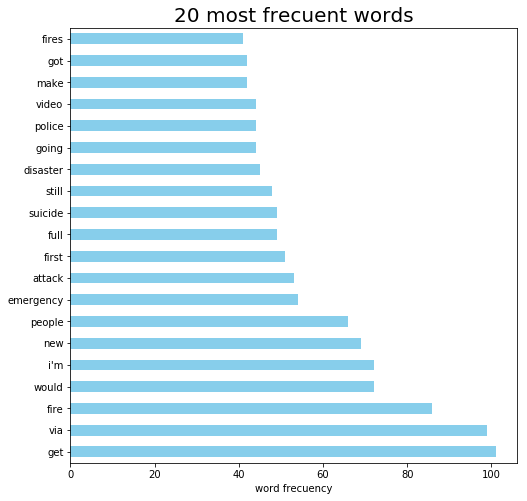

In [21]:

#get the 100 top words most used
words = ''.join(bb['text']).lower().split()
words_serie = pandas.Series(words)

# .value_counts()[:100]
# test = dict(test)
#remove stop words
stop_words ={'their', 'then', 'not', 'ma', 'here', 'other', 'won', 'up', 'weren', 'being', 'we', 'those', 'an', 'them', 'which', 'him', 'so', 'yourselves', 'what', 'own', 'has', 'should', 'above', 'in', 'myself', 'against', 'that', 'before', 't', 'just', 'into', 'about', 'most', 'd', 'where', 'our', 'or', 'such', 'ours', 'of', 'doesn', 'further', 'needn', 'now', 'some', 'too', 'hasn', 'more', 'the', 'yours', 'her', 'below', 'same', 'how', 'very', 'is', 'did', 'you', 'his', 'when', 'few', 'does', 'down', 'yourself', 'i', 'do', 'both', 'shan', 'have', 'itself', 'shouldn', 'through', 'themselves', 'o', 'didn', 've', 'm', 'off', 'out', 'but', 'and', 'doing', 'any', 'nor', 'over', 'had', 'because', 'himself', 'theirs', 'me', 'by', 'she', 'whom', 'hers', 're', 'hadn', 'who', 'he', 'my', 'if', 'will', 'are', 'why', 'from', 'am', 'with', 'been', 'its', 'ourselves', 'ain', 'couldn', 'a', 'aren', 'under', 'll', 'on', 'y', 'can', 'they', 'than', 'after', 'wouldn', 'each', 'once', 'mightn', 'for', 'this', 'these', 's', 'only', 'haven', 'having', 'all', 'don', 'it', 'there', 'until', 'again', 'to', 'while', 'be', 'no', 'during', 'herself', 'as', 'mustn', 'between', 'was', 'at', 'your', 'were', 'isn', 'wasn', '&amp;', "it's", "-", "...", "|",'2','like','one',"don't"}
# rpt[rpt['Sbb.head(5)
TK_ID'].isin(stk_list)]
# test = pandas.DataFrame(test)
# test

to_be_removed = []
key = 0

for word in words_serie:
    for st_word in stop_words:
        if word == st_word:
            to_be_removed.append(key)    
    key = key + 1

words_serie_clean = words_serie.drop(to_be_removed)

words_serie_count = words_serie_clean.value_counts()[:100]
word_frecuency = words_serie_count.head(20).plot.barh(figsize=(8,8),color = "skyblue")
word_frecuency.set_xlabel('word frecuency')
word_frecuency.set_title('20 most frecuent words',fontsize=20)


Text(0.5,1,'Location count')

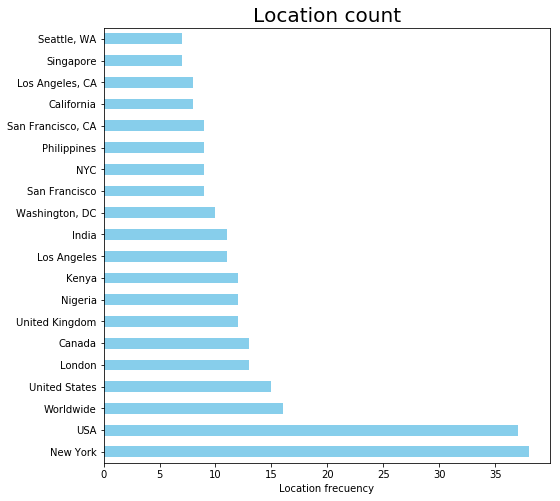

In [20]:
location = pandas.Series(bb["location"])
location_count = location.value_counts()
most_common_places = location_count.head(20).plot.barh(figsize=(8,8), color = "skyblue")
most_common_places.set_xlabel('Location frecuency')
most_common_places.set_title('Location count',fontsize=20)

In [29]:
##USA or world wide, might not be real emergencys....
key_words = pandas.DataFrame(bb["keyword"])
# unique_key_wors = key_words.unique()
key_words_count = key_words.value_counts()
key_words_count.head(50)


deluged                  23
demolished               22
rubble                   22
annihilation             21
first%20responders       21
seismic                  21
snowstorm                21
sirens                   21
obliteration             21
catastrophic             20
bioterrorism             20
mayhem                   20
avalanche                20
survivors                20
dead                     20
devastated               19
crushed                  19
terrorist                19
obliterate               19
suicide%20bomber         19
obliterated              19
hostage                  19
wild%20fires             19
trauma                   19
forest%20fires           18
electrocute              18
apocalypse               18
survive                  18
cyclone                  18
hailstorm                18
destroyed                18
arson                    18
trapped                  18
detonation               18
hijacking                18
drown               

In [48]:
unique_words = words_serie.unique()
unique_words = pandas.Series(unique_words)

unique_words_count = unique_words.count()
text_complexity = words_serie.count() / unique_words_count 
text_complexity

2.0854298399031346

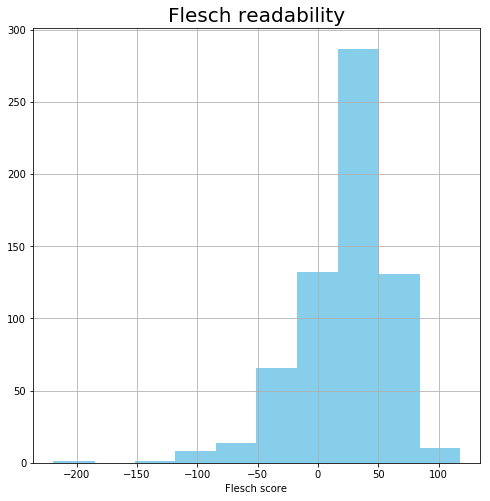

In [19]:
def FleschReadabilityEase(text):
	if len(text) > 0:
		return 206.835 - (1.015 * len(text.split()) / len(text.split('.')) ) - 84.6 * (sum(list(map(lambda x: 1 if x in ["a","i","e","o","u","y","A","E","I","O","U","y"] else 0,text))) / len(text.split()))

#TOTAL text readability
total_flesch = FleschReadabilityEase(''.join(fl['text']))

fl["flesch_eadability"] =  fl.apply(lambda row: FleschReadabilityEase(row['text']), axis=1)
test =fl.sort_values(by='flesch_eadability')
test.tail(50)
#90-100 - 11 years old
#60-70 - 13/15 years old
#0-30 - university
flesch_eadability_hsit = fl["flesch_eadability"].hist(figsize=(8,8), color = "skyblue" )
flesch_eadability_hsit.set_title('Flesch readability',fontsize=20)
flesch_eadability_hsit.set_xlabel('Flesch score')
test.tail(50)
flesch_eadability_hsit
